In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [9]:
df =pd.read_csv('bbc-text.csv')

In [27]:
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [10]:

category_counts = df['category'].value_counts()
a
X = df['text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=category_counts.index)
conf_matrix = confusion_matrix(y_test, y_pred, labels=category_counts.index)

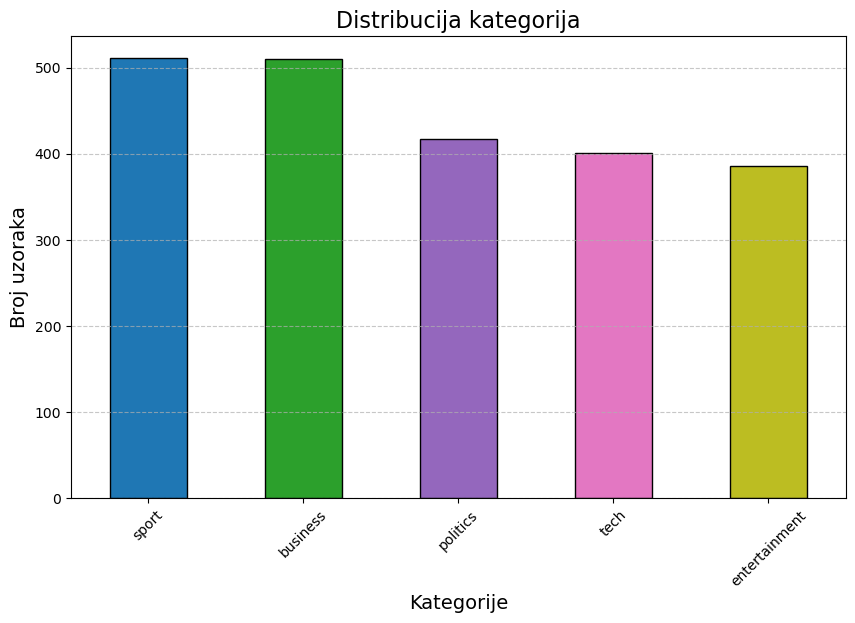

In [25]:


category_counts = df['category'].value_counts()


colors = [plt.cm.tab10(i / len(category_counts)) for i in range(len(category_counts))]


plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Distribucija kategorija', fontsize=16)
plt.xlabel('Kategorije', fontsize=14)
plt.ylabel('Broj uzoraka', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

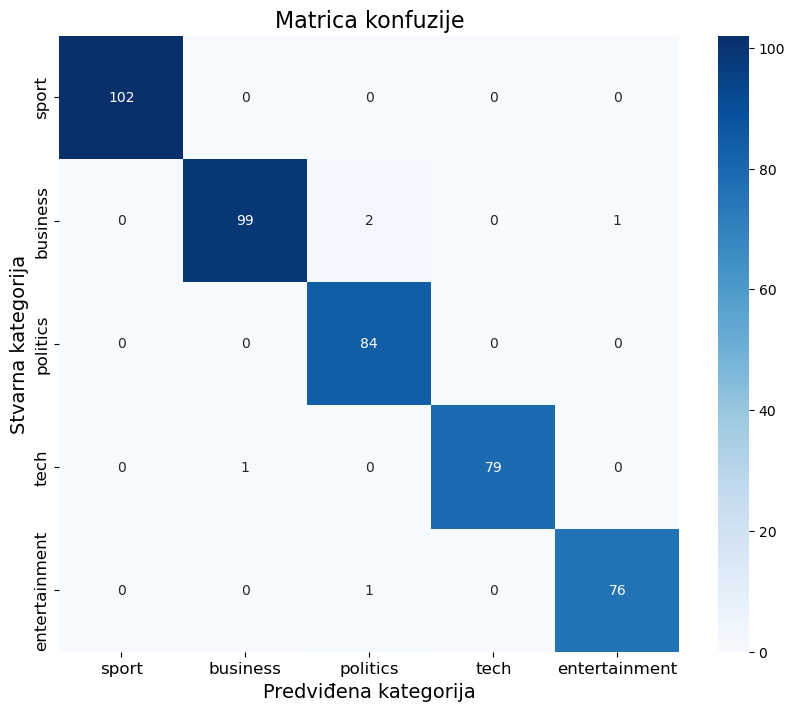

In [14]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=category_counts.index, yticklabels=category_counts.index)
plt.title("Matrica konfuzije", fontsize=16)
plt.xlabel("Predviđena kategorija", fontsize=14)
plt.ylabel("Stvarna kategorija", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [15]:

print(f"Točnost modela: {accuracy:.2f}")
print("\nIzvještaj klasifikacije:\n")
print(classification_rep)


Točnost modela: 0.99

Izvještaj klasifikacije:

               precision    recall  f1-score   support

        sport       0.99      0.97      0.98       102
     business       0.99      0.99      0.99        77
     politics       0.97      1.00      0.98        84
         tech       1.00      1.00      1.00       102
entertainment       1.00      0.99      0.99        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445



In [16]:
new_articles = [
    "Apple releases new iPhone with advanced features and better camera.",
    "Manchester United secures a dramatic victory in the Premier League.",
    "Government announces new policies for renewable energy investment."
]


new_articles_tfidf = tfidf.transform(new_articles)
predicted_categories = model.predict(new_articles_tfidf)


print("\nPredikcije za nove članke:")
for article, category in zip(new_articles, predicted_categories):
    print(f"\nČlanak: {article}\nPredviđena kategorija: {category}")


Predikcije za nove članke:

Članak: Apple releases new iPhone with advanced features and better camera.
Predviđena kategorija: tech

Članak: Manchester United secures a dramatic victory in the Premier League.
Predviđena kategorija: sport

Članak: Government announces new policies for renewable energy investment.
Predviđena kategorija: business


In [29]:


  
count_vectorizer = CountVectorizer(stop_words='english')
X_counts = count_vectorizer.fit_transform(X)
words = count_vectorizer.get_feature_names_out()

category_word_counts = {}
for category in df['category'].unique():
    category_texts = df[df['category'] == category]['text']
    category_counts = count_vectorizer.transform(category_texts).sum(axis=0).A1
    most_common_words = Counter(dict(zip(words, category_counts))).most_common(10)
    category_word_counts[category] = most_common_words
    print(f"\nNajčešće riječi za kategoriju '{category}':")
    for word, count in most_common_words:
        print(f"{word}: {count}")






Najčešće riječi za kategoriju 'tech':
said: 1567
people: 961
new: 517
mr: 509
technology: 504
mobile: 494
users: 408
games: 406
music: 388
use: 382

Najčešće riječi za kategoriju 'business':
said: 1680
year: 713
mr: 600
market: 434
new: 417
company: 416
growth: 385
firm: 362
economy: 359
government: 341

Najčešće riječi za kategoriju 'sport':
said: 942
year: 494
game: 482
england: 461
time: 423
win: 419
world: 388
players: 308
team: 302
play: 296

Najčešće riječi za kategoriju 'entertainment':
said: 825
film: 788
best: 619
year: 455
music: 435
new: 323
awards: 273
award: 244
uk: 234
won: 233

Najčešće riječi za kategoriju 'politics':
said: 2241
mr: 1686
labour: 767
government: 732
people: 623
election: 608
party: 586
blair: 578
minister: 436
new: 430


In [32]:

def get_ngrams(category_texts, n):
    ngram_vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_counts = ngram_vectorizer.fit_transform(category_texts)
    ngram_words = ngram_vectorizer.get_feature_names_out()
    ngram_total_counts = ngram_counts.sum(axis=0).A1
    return Counter(dict(zip(ngram_words, ngram_total_counts))).most_common(10)

for category in df['category'].unique():
    category_texts = df[df['category'] == category]['text']

    print(f"\nNajčešći bigrami za kategoriju '{category}':")
    bigrams = get_ngrams(category_texts, 2)
    for bigram, count in bigrams:
        print(f"{bigram}: {count}")

    print(f"\nNajčešći trigrami za kategoriju '{category}':")
    trigrams = get_ngrams(category_texts, 3)
    for trigram, count in trigrams:
        print(f"{trigram}: {count}")



Najčešći bigrami za kategoriju 'tech':
said mr: 192
bbc news: 93
mobile phone: 91
high definition: 86
told bbc: 86
news website: 80
mobile phones: 72
anti virus: 55
wi fi: 54
digital music: 52

Najčešći trigrami za kategoriju 'tech':
bbc news website: 80
told bbc news: 79
digital music players: 23
bbc world service: 19
open source software: 13
peer peer networks: 13
anti virus firm: 12
anti virus software: 12
high definition tv: 12
said mr irish: 12

Najčešći bigrami za kategoriju 'business':
chief executive: 124
economic growth: 78
stock market: 77
analysts said: 66
deutsche boerse: 65
new york: 63
oil prices: 62
stock exchange: 52
mr ebbers: 49
mr glazer: 46

Najčešći trigrami za kategoriju 'business':
london stock exchange: 22
securities exchange commission: 21
reuters news agency: 17
gross domestic product: 16
chief financial officer: 14
international monetary fund: 14
current account deficit: 13
high oil prices: 13
chapter 11 bankruptcy: 12
president george bush: 12

Najčešći big

In [34]:
new_articles = [
    "Superb Keys stuns Sabalenka to win first Grand Slam title.",
    "Musk, MrBeast, Larry Ellison - Who might buy TikTok?",
    "Human hands are astonishing tools. Here's why robots are struggling to match them."
]


new_articles_tfidf = tfidf.transform(new_articles)
predicted_categories = model.predict(new_articles_tfidf)

print("\nPredikcije za nove članke:")
for article, category in zip(new_articles, predicted_categories):
    print(f"\nČlanak: {article}\nPredviđena kategorija: {category}")


Predikcije za nove članke:

Članak: Superb Keys stuns Sabalenka to win first Grand Slam title.
Predviđena kategorija: sport

Članak: Musk, MrBeast, Larry Ellison - Who might buy TikTok?
Predviđena kategorija: business

Članak: Human hands are astonishing tools. Here's why robots are struggling to match them.
Predviđena kategorija: tech


In [21]:
for category, words_counts in category_word_counts.items():
    words, counts = zip(*words_counts)
    df_words = pd.DataFrame({'Riječ': words, 'Pojavljivanja': counts})
    print(f"\nTablica najčešćih riječi za kategoriju '{category}':")
    print(df_words)




Tablica najčešćih riječi za kategoriju 'tech':
        Riječ  Pojavljivanja
0        said           1567
1      people            961
2         new            517
3          mr            509
4  technology            504
5      mobile            494
6       users            408
7       games            406
8       music            388
9         use            382

Tablica najčešćih riječi za kategoriju 'business':
        Riječ  Pojavljivanja
0        said           1680
1        year            713
2          mr            600
3      market            434
4         new            417
5     company            416
6      growth            385
7        firm            362
8     economy            359
9  government            341

Tablica najčešćih riječi za kategoriju 'sport':
     Riječ  Pojavljivanja
0     said            942
1     year            494
2     game            482
3  england            461
4     time            423
5      win            419
6    world            388
7  pl

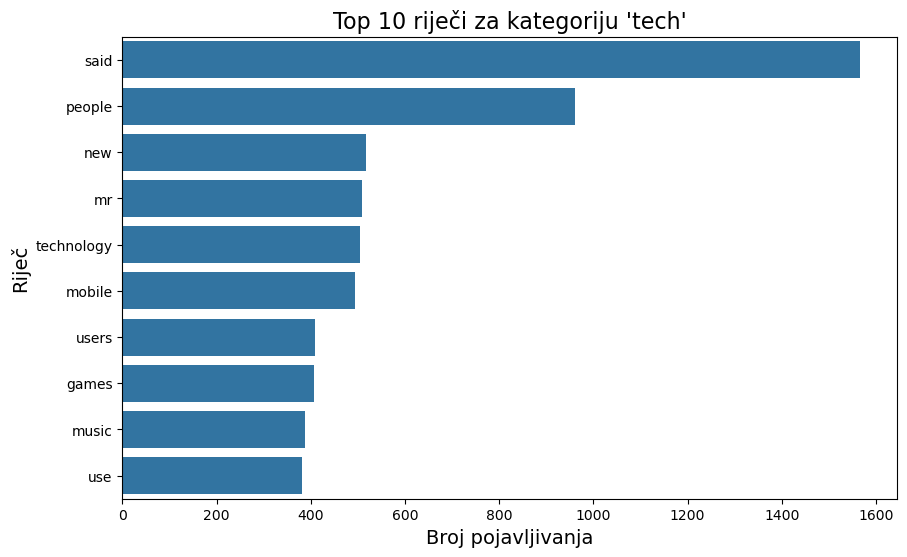


Top 10 bigrama za kategoriju 'tech':
said mr: 192
bbc news: 93
mobile phone: 91
high definition: 86
told bbc: 86
news website: 80
mobile phones: 72
anti virus: 55
wi fi: 54
digital music: 52

Top 10 trigrami za kategoriju 'tech':
bbc news website: 80
told bbc news: 79
digital music players: 23
bbc world service: 19
open source software: 13
peer peer networks: 13
anti virus firm: 12
anti virus software: 12
high definition tv: 12
said mr irish: 12


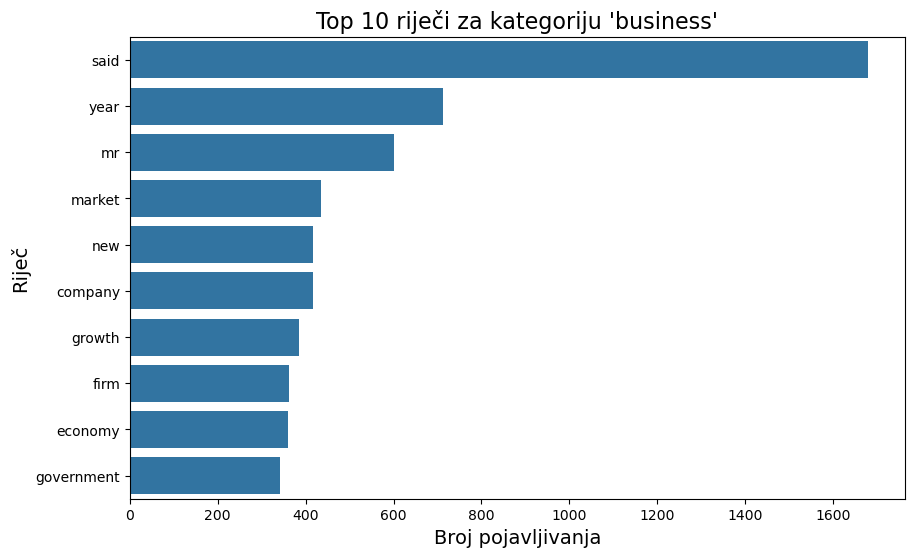


Top 10 bigrama za kategoriju 'business':
chief executive: 124
economic growth: 78
stock market: 77
analysts said: 66
deutsche boerse: 65
new york: 63
oil prices: 62
stock exchange: 52
mr ebbers: 49
mr glazer: 46

Top 10 trigrami za kategoriju 'business':
london stock exchange: 22
securities exchange commission: 21
reuters news agency: 17
gross domestic product: 16
chief financial officer: 14
international monetary fund: 14
current account deficit: 13
high oil prices: 13
chapter 11 bankruptcy: 12
president george bush: 12


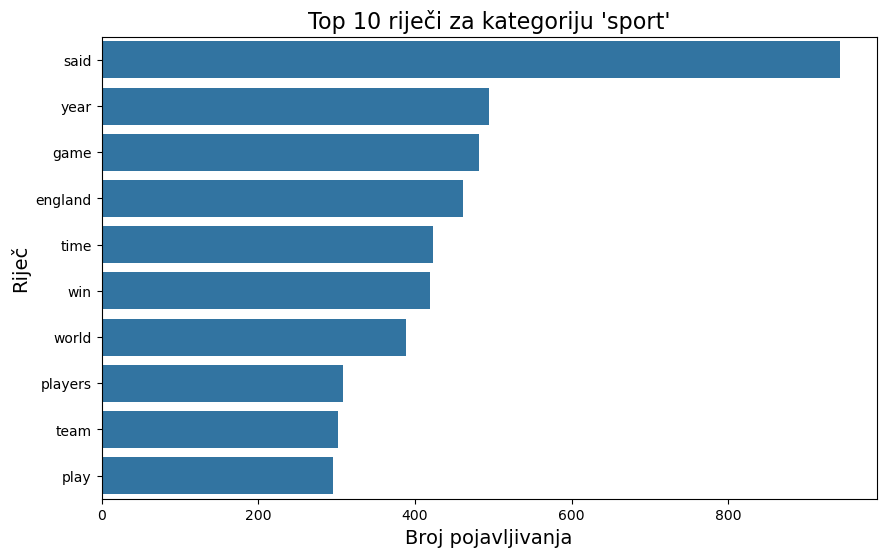


Top 10 bigrama za kategoriju 'sport':
year old: 196
new zealand: 89
world cup: 86
grand slam: 81
told bbc: 79
champions league: 74
australian open: 67
bbc sport: 66
manchester united: 61
second half: 57

Top 10 trigrami za kategoriju 'sport':
told bbc sport: 48
coach andy robinson: 27
sir alex ferguson: 21
31 year old: 20
european indoor championships: 20
world cross country: 18
25 year old: 17
sir clive woodward: 17
bbc radio live: 16
told bbc radio: 16


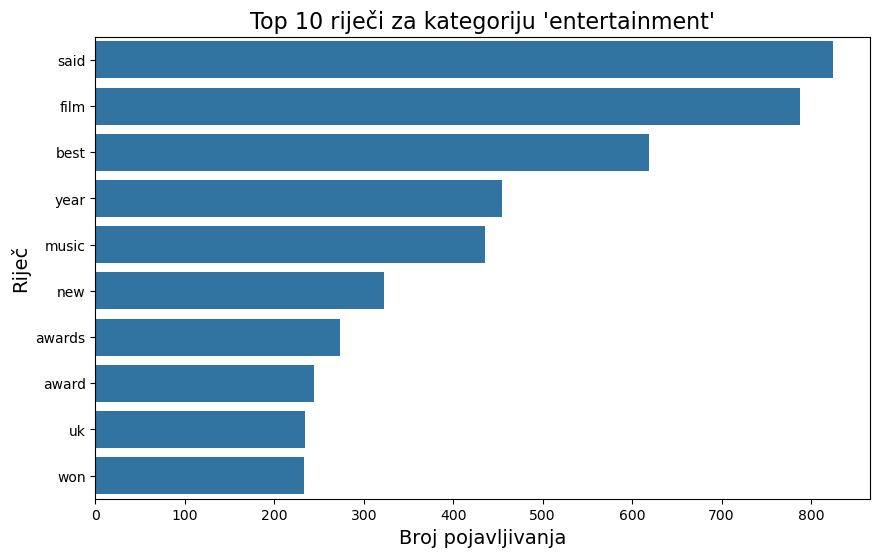


Top 10 bigrama za kategoriju 'entertainment':
box office: 90
year old: 70
new york: 63
los angeles: 56
million dollar: 55
won best: 54
dollar baby: 53
best film: 51
named best: 50
vera drake: 46

Top 10 trigrami za kategoriju 'entertainment':
million dollar baby: 53
actor jamie foxx: 20
best supporting actor: 17
best song 25: 16
song 25 years: 16
berlin film festival: 15
best supporting actress: 14
eternal sunshine spotless: 14
jamie foxx actress: 14
sunshine spotless mind: 14


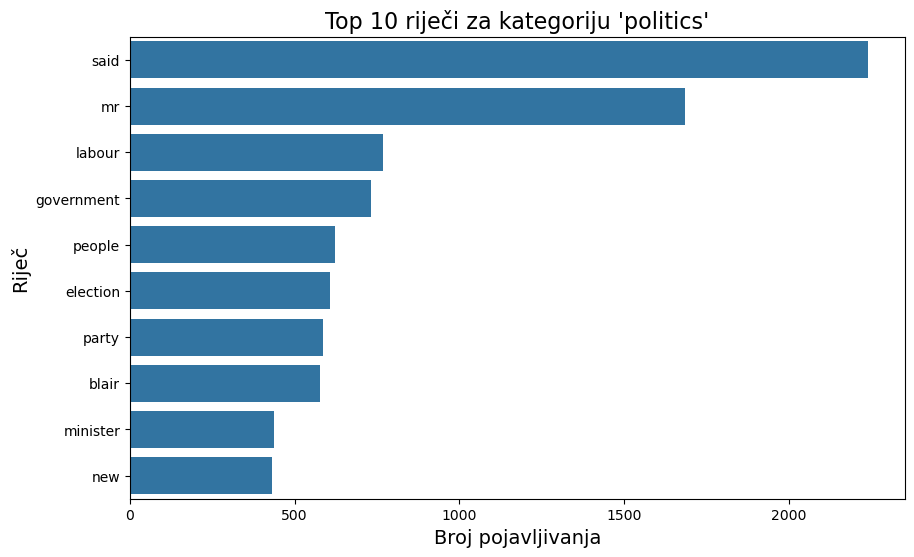


Top 10 bigrama za kategoriju 'politics':
mr blair: 326
prime minister: 276
mr brown: 240
tony blair: 179
general election: 163
mr howard: 154
told bbc: 140
michael howard: 130
said mr: 112
kilroy silk: 110

Top 10 trigrami za kategoriju 'politics':
leader michael howard: 58
mr blair said: 57
mr kilroy silk: 57
told bbc radio: 57
radio today programme: 46
bbc radio today: 45
told bbc news: 44
mr howard said: 41
tory leader michael: 41
leader charles kennedy: 32


In [22]:


for category, most_common_words in category_word_counts.items():
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f"Top 10 riječi za kategoriju '{category}'", fontsize=16)
    plt.xlabel("Broj pojavljivanja", fontsize=14)
    plt.ylabel("Riječ", fontsize=14)
    plt.show()

    print(f"\nTop 10 bigrama za kategoriju '{category}':")
    bigrams = get_ngrams(df[df['category'] == category]['text'], 2)
    for bigram, count in bigrams:
        print(f"{bigram}: {count}")

    print(f"\nTop 10 trigrami za kategoriju '{category}':")
    trigrams = get_ngrams(df[df['category'] == category]['text'], 3)
    for trigram, count in trigrams:
        print(f"{trigram}: {count}")